# Products Data Loading and Preprocessing 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Table of Contents
* [Loading the Data](#loading)
   
* [Dealing with nulls](#nulls)
    * [Dropping columns](#dropcolumns)
    * [Dropping rows](#droprows)
    
* [Taking a Sample](#sample)


## Loading the Raw Data

In [2]:
products_df = []

with open('data/meta_Clothing_Shoes_and_Jewelry.json', 'r') as f:
    
    reader = pd.read_json(f, orient = 'records', lines = True, chunksize = 50_000, nrows = 2685059)
    
    total = 2685059/50_000
    counter = 0
    
    for chunk in reader:
                
        products_df.append(chunk)
        
        counter += 1
        print(counter/total*100, end="\r")
        
products_df = pd.concat(products_df, ignore_index = True)

In [3]:
products_df.head()

,category,description,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item,tech2
0,"[Clothing, Shoes & Jewelry, Costumes & Accesso...","[6"" long, stretched waist measures 11 1/2"" acr...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Big Dreams,"[3 layers of tulle, 6"" long, stretched waist m...","19,963,069inClothing,ShoesJewelry(",5 star5 star (0%),0000037214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...,Anello,"[Polyester Canvas Waterproof, Imported, Size: ...","4,537,420inClothing,ShoesJewelry(",5 star,0201377179,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","3,994,472inClothing,ShoesJewelry(",5 star,0204444454,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B07CJF5HLR, B01EBI8UH6, B01N1LR908, B074M4QKG...",$70.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","635,761inClothing,ShoesJewelry(",5 star,0204444403,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B01DLVYOPG, B07CJF5HLR, B01MSS59Y6, B071YBC1J...",$65.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",[Brand New. Hat Centre Length: adult about 8c...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,"[Imported, Plush,Cotton, Polyester, Lovely for...","5,061,041inClothing,ShoesJewelry(",5 star5 star (0%),0206313535,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B00VGT93YS, B07FTY87LM, B01IKVOY8E, B01GF6C6F...",$18.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Columns<a name='dropping'></a>
Image data won't be considered in this project so `imageURL` and `imageURLHighRes`. `Fit`, `tech1`, and `tech2` are mostly empty and don't provide important information.

In [4]:
products_df.columns

Index(['category', 'description', 'title', 'brand', 'feature', 'rank', 'date',
       'asin', 'imageURL', 'imageURLHighRes', 'also_view', 'price', 'fit',
       'also_buy', 'main_cat', 'tech1', 'details', 'similar_item', 'tech2'],
      dtype='object')

In [5]:
products_df = products_df.drop(columns = ['imageURL', 'imageURLHighRes', 'fit', 'tech1', 'tech2'])

In [6]:
# Sanity check
products_df.columns

Index(['category', 'description', 'title', 'brand', 'feature', 'rank', 'date',
       'asin', 'also_view', 'price', 'also_buy', 'main_cat', 'details',
       'similar_item'],
      dtype='object')

## Saving and Reloading Data<a id='reloading'></a>
Loading the data from the JSON file takes a while, so the raw data as a csv then reloaded here.

In [7]:
# Saving the loaded data
products_df.to_csv('Data/raw_products.csv', index = False)

In [5]:
# Reloading the data
products_df = pd.read_csv('Data/raw_products.csv')

In [6]:
products_df.head()

,category,description,title,brand,feature,rank,date,asin,also_view,price,also_buy,main_cat,details,similar_item
0,"['Clothing, Shoes & Jewelry', 'Costumes & Acce...","['6"" long, stretched waist measures 11 1/2"" ac...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Big Dreams,"['3 layers of tulle', '6"" long, stretched wais...","19,963,069inClothing,ShoesJewelry(",5 star5 star (0%),0000037214,NaN,NaN,NaN,NaN,NaN,NaN
1,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...,Anello,"['Polyester Canvas Waterproof', 'Imported', 'S...","4,537,420inClothing,ShoesJewelry(",5 star,0201377179,NaN,NaN,NaN,NaN,NaN,NaN
2,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,"['PU Leather', 'Imported', 'Size: Large PU Lea...","3,994,472inClothing,ShoesJewelry(",5 star,0204444454,"['B07CJF5HLR', 'B01EBI8UH6', 'B01N1LR908', 'B0...",$70.00,NaN,NaN,NaN,NaN
3,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,"['PU Leather', 'Imported', 'Size: Large PU Lea...","635,761inClothing,ShoesJewelry(",5 star,0204444403,"['B01DLVYOPG', 'B07CJF5HLR', 'B01MSS59Y6', 'B0...",$65.99,NaN,NaN,NaN,NaN
4,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",['Brand New. Hat Centre Length: adult about 8...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,"['Imported', 'Plush,Cotton, Polyester', 'Lovel...","5,061,041inClothing,ShoesJewelry(",5 star5 star (0%),0206313535,"['B00VGT93YS', 'B07FTY87LM', 'B01IKVOY8E', 'B0...",$18.99,NaN,NaN,NaN,NaN


In [7]:
products_df.drop_duplicates()

## Dealing with Nulls<a id='nulls'><a/>

In [4]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category         0.000000
description     25.005298
title            0.002197
brand           29.894762
feature          6.069066
rank             2.600092
date             6.907483
asin             0.000000
also_view       72.385188
price           66.447776
also_buy        82.884398
main_cat        92.058722
details         95.717673
similar_item    99.362137
dtype: float64

Since we have a large dataframe, we are going to be dropping rows with relevant null values. The only column we need to be not null is `asin`, the unique identifier. Having the price would be nice, so lets drop the rows containing no prices. We are going to remove the `also_view`, `also_buy`, `main_cat`, and `similar_item` columns, these are mostly null and things we are trying to predict anyway.

### Dropping Columns <a id='dropcolumns'><a/>

In [5]:
products_df.drop(columns=['also_view', 'also_buy', 'main_cat', 'similar_item'], inplace=True)

In [6]:
# Sanity check
products_df.columns

Index(['category', 'description', 'title', 'brand', 'feature', 'rank', 'date',
       'asin', 'price', 'details'],
      dtype='object')

Lets take a look at `details`.

In [7]:
products_df.loc[2685031, 'details']

'\n      <div class="content">\n\n\n\n\n\n\n<ul>\n\n\n\n\n\n\n\n\n\n\n\n\n\n                                                                                \n\n\n    <li><b>\n    Item Weight: \n    </b>\n    9 ounces\n    </li>\n\n\n\n\n\n\n\n\n<li><b>Shipping Weight:</b> 9 ounces (<a href="/gp/help/seller/shipping.html/ref=dp_pd_shipping?ie=UTF8&amp;asin=B071ZL3PBK&amp;seller=">View shipping rates and policies</a>)</li>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<li><b>ASIN: </b>B071ZL3PBK</li>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<li><b>Average Customer Review:</b> \n\n\n\n\n<span class="dpProductDetailB071ZL3PBK">\n  <span class="a-declarative" data-action="a-popover" data-a-popover="{&quot;closeButton&quot;:&quot;false&quot;,&quot;max-width&quot;:&quot;700&quot;,&quot;position&quot;:&quot;triggerBottom&quot;,&quot;url&quot;:&quot;/review/widgets/average-customer-review/popover/ref=acr_

Investigating the `details` column, it looks like some html stuff that wouldn't be used. Lets drop the column.

In [8]:
products_df.drop(columns=['details'], inplace=True)

In [9]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685059 entries, 0 to 2685058
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   category     object
 1   description  object
 2   title        object
 3   brand        object
 4   feature      object
 5   rank         object
 6   date         object
 7   asin         object
 8   price        object
dtypes: object(9)
memory usage: 184.4+ MB


### Dropping Rows<a id='droprows'><a/>

In [10]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category        0.000000
description    25.005298
title           0.002197
brand          29.894762
feature         6.069066
rank            2.600092
date            6.907483
asin            0.000000
price          66.447776
dtype: float64


Lets drop the rows where `description` and `title` is null. The title is how the product would be identified and the descriptions is how the recommendations would be made. Lets drop rows without a rank because that is how the popularity based recommender system would rely on.

In [11]:
# Dropping null titles
products_df.dropna(axis = 0, subset=['title'], inplace=True)

# Dropping null descriptions
products_df.dropna(axis = 0, subset=['description'], inplace=True)

# Dropping null descriptions
products_df.dropna(axis = 0, subset=['rank'], inplace=True)

In [12]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category        0.000000
description     0.000000
title           0.000000
brand          27.193144
feature         2.057410
rank            0.000000
date            7.112410
asin            0.000000
price          61.771925
dtype: float64

## Cleaning Data <a id='cleaning'><a/>

#### `price` column <a id='pricecolumn'><a/>

In [13]:
# Dropping null prices
products_df.dropna(axis = 0, subset=['price'], inplace=True)

In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749656 entries, 2 to 2685057
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     749656 non-null  object
 1   description  749656 non-null  object
 2   title        749656 non-null  object
 3   brand        575879 non-null  object
 4   feature      741523 non-null  object
 5   rank         749656 non-null  object
 6   date         687207 non-null  object
 7   asin         749656 non-null  object
 8   price        749656 non-null  object
dtypes: object(9)
memory usage: 57.2+ MB


In [15]:
products_df.loc[2051736:2051750, 'price']

2051736     $12.18 - $23.19
2051737               $7.98
2051738    $31.00 - $124.95
2051739    $33.20 - $119.95
2051744    $35.99 - $120.00
2051747     $12.91 - $21.58
2051748    $34.72 - $135.00
2051750     $12.91 - $18.43
Name: price, dtype: object

The prices seem to either have one price with dollar sign in front, or be in a range with a dash seperating the range and a dollar sign in front of the number. Lets save the price column into its own series to analyze.

In [16]:
prices = products_df['price']
prices

2                   $70.00
3                   $65.99
4                   $18.99
5                   $23.99
8                   $65.33
                ...       
2685051             $12.21
2685052    $24.77 - $80.00
2685053             $18.99
2685054              $4.99
2685057    $28.23 - $80.00
Name: price, Length: 749656, dtype: object

In [17]:
prices = prices.str.replace(pat='\$', repl='')
prices

C:\Users\maria\AppData\Local\Temp\ipykernel_12792\2440664656.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  prices = prices.str.replace(pat='\$', repl='')


2                  70.00
3                  65.99
4                  18.99
5                  23.99
8                  65.33
               ...      
2685051            12.21
2685052    24.77 - 80.00
2685053            18.99
2685054             4.99
2685057    28.23 - 80.00
Name: price, Length: 749656, dtype: object

In [18]:
prices = prices.str.replace(pat='\,', repl='')

C:\Users\maria\AppData\Local\Temp\ipykernel_12792\3013247059.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  prices = prices.str.replace(pat='\,', repl='')


In [19]:
prices = prices.str.split(pat=' - ')
prices

2                 [70.00]
3                 [65.99]
4                 [18.99]
5                 [23.99]
8                 [65.33]
                ...      
2685051           [12.21]
2685052    [24.77, 80.00]
2685053           [18.99]
2685054            [4.99]
2685057    [28.23, 80.00]
Name: price, Length: 749656, dtype: object

In [20]:
prices_df = pd.DataFrame(prices.to_list(), columns=['price1', 'price2'], index=prices.index)
prices_df

,price1,price2
2,70.00,None
3,65.99,None
4,18.99,None
5,23.99,None
8,65.33,None
...,...,...
2685051,12.21,None
2685052,24.77,80.00
2685053,18.99,None
2685054,4.99,None


In [21]:
prices_df.apply(pd.to_numeric)

,price1,price2
2,70.00,NaN
3,65.99,NaN
4,18.99,NaN
5,23.99,NaN
8,65.33,NaN
...,...,...
2685051,12.21,NaN
2685052,24.77,80.0
2685053,18.99,NaN
2685054,4.99,NaN


In [22]:
prices_df = prices_df.fillna(axis=1, method='ffill')

In [23]:
prices_df = prices_df.astype('float64')

In [24]:
prices = round(prices_df.mean(axis=1), 2)
prices

2          70.00
3          65.99
4          18.99
5          23.99
8          65.33
           ...  
2685051    12.21
2685052    52.38
2685053    18.99
2685054     4.99
2685057    54.12
Length: 749656, dtype: float64

In [25]:
products_df['price'] = prices

In [26]:
products_df['price']

2          70.00
3          65.99
4          18.99
5          23.99
8          65.33
           ...  
2685051    12.21
2685052    52.38
2685053    18.99
2685054     4.99
2685057    54.12
Name: price, Length: 749656, dtype: float64

### `rank` column <a id='rank'><a/>

In [27]:
products_df.dropna(axis = 0, subset=['rank'], inplace=True)

In [28]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category        0.000000
description     0.000000
title           0.000000
brand          23.180899
feature         1.084898
rank            0.000000
date            8.330354
asin            0.000000
price           0.000000
dtype: float64

In [29]:
ranks = products_df['rank']
ranks

2                          3,994,472inClothing,ShoesJewelry(
3                            635,761inClothing,ShoesJewelry(
4                          5,061,041inClothing,ShoesJewelry(
5                         10,635,107inClothing,ShoesJewelry(
8                          1,615,335inClothing,ShoesJewelry(
                                 ...                        
2685051    >#399,056 in Home & Kitchen (See Top 100 in Ho...
2685052                      956,501inClothing,ShoesJewelry(
2685053                    3,633,844inClothing,ShoesJewelry(
2685054                    1,671,980inClothing,ShoesJewelry(
2685057                    1,228,949inClothing,ShoesJewelry(
Name: rank, Length: 749656, dtype: object

In [30]:
# removing commas
ranks = ranks.str.replace(',', '')

#removing spaces
ranks = ranks.str.replace(' ', '')
ranks

2                             3994472inClothingShoesJewelry(
3                              635761inClothingShoesJewelry(
4                             5061041inClothingShoesJewelry(
5                            10635107inClothingShoesJewelry(
8                             1615335inClothingShoesJewelry(
                                 ...                        
2685051    >#399056inHome&Kitchen(SeeTop100inHome&Kitchen...
2685052                        956501inClothingShoesJewelry(
2685053                       3633844inClothingShoesJewelry(
2685054                       1671980inClothingShoesJewelry(
2685057                       1228949inClothingShoesJewelry(
Name: rank, Length: 749656, dtype: object

In [31]:
ranks = ranks[ranks.str.match('(\d+)inClothing')]
ranks

2           3994472inClothingShoesJewelry(
3            635761inClothingShoesJewelry(
4           5061041inClothingShoesJewelry(
5          10635107inClothingShoesJewelry(
8           1615335inClothingShoesJewelry(
                        ...               
2685050     1908928inClothingShoesJewelry(
2685052      956501inClothingShoesJewelry(
2685053     3633844inClothingShoesJewelry(
2685054     1671980inClothingShoesJewelry(
2685057     1228949inClothingShoesJewelry(
Name: rank, Length: 680980, dtype: object

In [32]:
# Keeping all the numbers 
ranks = ranks.str.replace('[^\d+]', '')
ranks

C:\Users\maria\AppData\Local\Temp\ipykernel_12792\2383812250.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ranks = ranks.str.replace('[^\d+]', '')


2           3994472
3            635761
4           5061041
5          10635107
8           1615335
             ...   
2685050     1908928
2685052      956501
2685053     3633844
2685054     1671980
2685057     1228949
Name: rank, Length: 680980, dtype: object

In [33]:
# putting in right data type
ranks = ranks.astype('int64')
ranks

2           3994472
3            635761
4           5061041
5          10635107
8           1615335
             ...   
2685050     1908928
2685052      956501
2685053     3633844
2685054     1671980
2685057     1228949
Name: rank, Length: 680980, dtype: int64

In [230]:
products_df['rank'] = ranks.astype('int64')

In [35]:
products_df = products_df.dropna(axis=0, subset=['rank'])

In [231]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680980 entries, 2 to 2685057
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     680980 non-null  object 
 1   description  680980 non-null  object 
 2   title        680980 non-null  object 
 3   brand        680980 non-null  object 
 4   feature      680927 non-null  object 
 5   rank         680980 non-null  int64  
 6   asin         680980 non-null  object 
 7   price        680980 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.9+ MB


### `date` column <a id='datecol'><a/>
Lets investigate the `date` column.

In [37]:
# checking the filtered dates
dates = products_df['date']

In [38]:
dates.str.match\
    ('(January|February|March|April|May|June|July|August|September|October|November|December).+?(\d{1,2})\,\s(\d\d\d\d)'\
        , na=False).sum()

0

From the columns we filtered, there are no dates in the date column. Let's drop it from the working dataframe, maybe some analysis on the items with dates could be done later.

In [39]:
products_df = products_df.drop(columns='date')

In [40]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680980 entries, 2 to 2685057
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     680980 non-null  object 
 1   description  680980 non-null  object 
 2   title        680980 non-null  object 
 3   brand        507568 non-null  object 
 4   feature      680927 non-null  object 
 5   rank         680980 non-null  float64
 6   asin         680980 non-null  object 
 7   price        680980 non-null  float64
dtypes: float64(2), object(6)
memory usage: 46.8+ MB


### `brand` column

23.8 % of the brand column is null. Lets fill the nulls with 'unknown' 

In [41]:
products_df['brand'] = products_df['brand'].fillna('Unknown')

## Binarizing Columns with Lists

### `category` column

In [42]:
categories = products_df['category']
categories

2          ['Clothing, Shoes & Jewelry', 'Luggage & Trave...
3          ['Clothing, Shoes & Jewelry', 'Luggage & Trave...
4          ['Clothing, Shoes & Jewelry', 'Novelty & More'...
5          ['Clothing, Shoes & Jewelry', 'Women', 'Clothi...
8          ['Clothing, Shoes & Jewelry', 'Luggage & Trave...
                                 ...                        
2685050    ['Clothing, Shoes & Jewelry', 'Men', 'Accessor...
2685052    ['Clothing, Shoes & Jewelry', 'Men', 'Shoes', ...
2685053    ['Clothing, Shoes & Jewelry', 'Women', 'Clothi...
2685054    ['Clothing, Shoes & Jewelry', 'Baby', 'Baby Gi...
2685057    ['Clothing, Shoes & Jewelry', 'Men', 'Shoes', ...
Name: category, Length: 680980, dtype: object

In [43]:
categories.iloc[0]

'[\'Clothing, Shoes & Jewelry\', \'Luggage & Travel Gear\', \'Backpacks\', "Kids\' Backpacks", \'PU Leather\', \'Imported\', \'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211\', \'Color: PINK BEIGE | Condition: 100% brand new\', \'- Made of stylish, elegant and durable and PU leather fabric\', \'- Roomy main compartment and multiple pockets for functionally\', \'- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles\']'

In [44]:
# Getting rid of the beginning of the string of the list
categories = categories.str.replace('\[\'', '')

C:\Users\maria\AppData\Local\Temp\ipykernel_12792\2206977246.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  categories = categories.str.replace('\[\'', '')


In [45]:
# Getting rid of the end of the string of the list
categories = categories.str.replace('\'\]', '')

C:\Users\maria\AppData\Local\Temp\ipykernel_12792\3141548972.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  categories = categories.str.replace('\'\]', '')


In [46]:
# Strings with " messed with the categories, so replacing it with '
categories = categories.str.replace('\"', '\'')

In [47]:
categories.iloc[0]

"Clothing, Shoes & Jewelry', 'Luggage & Travel Gear', 'Backpacks', 'Kids' Backpacks', 'PU Leather', 'Imported', 'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211', 'Color: PINK BEIGE | Condition: 100% brand new', '- Made of stylish, elegant and durable and PU leather fabric', '- Roomy main compartment and multiple pockets for functionally', '- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles"

In [48]:
# Turning the lists into actual lists
categories = categories.str.split(pat = '\', \'')

In [49]:
categories

2          [Clothing, Shoes & Jewelry, Luggage & Travel G...
3          [Clothing, Shoes & Jewelry, Luggage & Travel G...
4          [Clothing, Shoes & Jewelry, Novelty & More, Cl...
5          [Clothing, Shoes & Jewelry, Women, Clothing, S...
8          [Clothing, Shoes & Jewelry, Luggage & Travel G...
                                 ...                        
2685050    [Clothing, Shoes & Jewelry, Men, Accessories, ...
2685052     [Clothing, Shoes & Jewelry, Men, Shoes, Oxfords]
2685053    [Clothing, Shoes & Jewelry, Women, Clothing, D...
2685054    [Clothing, Shoes & Jewelry, Baby, Baby Girls, ...
2685057     [Clothing, Shoes & Jewelry, Men, Shoes, Oxfords]
Name: category, Length: 680980, dtype: object

Lets check that the split worked:

In [50]:
categories.iloc[1]

['Clothing, Shoes & Jewelry',
 'Luggage & Travel Gear',
 'Backpacks',
 "Kids' Backpacks",
 'PU Leather',
 'Imported',
 'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211',
 'Color: BLACK | Condition: 100% brand new',
 '- Made of stylish, elegant and durable and PU leather fabric',
 '- Roomy main compartment and multiple pockets for functionally',
 '- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles']

In [51]:
products_df['category'] = categories

In [52]:
categories

2          [Clothing, Shoes & Jewelry, Luggage & Travel G...
3          [Clothing, Shoes & Jewelry, Luggage & Travel G...
4          [Clothing, Shoes & Jewelry, Novelty & More, Cl...
5          [Clothing, Shoes & Jewelry, Women, Clothing, S...
8          [Clothing, Shoes & Jewelry, Luggage & Travel G...
                                 ...                        
2685050    [Clothing, Shoes & Jewelry, Men, Accessories, ...
2685052     [Clothing, Shoes & Jewelry, Men, Shoes, Oxfords]
2685053    [Clothing, Shoes & Jewelry, Women, Clothing, D...
2685054    [Clothing, Shoes & Jewelry, Baby, Baby Girls, ...
2685057     [Clothing, Shoes & Jewelry, Men, Shoes, Oxfords]
Name: category, Length: 680980, dtype: object

#### Picking a Main Category

To tackle the category columns, lets 

First, note that all category lists start with `Clothing, Shoes & Jewelry`.

In [53]:
maincat_dict = {}

for i in categories:
    
    for item in i[1:3]:

        if item not in maincat_dict:
            maincat_dict[item] = 1

        else:
            maincat_dict[item] += 1       

In [54]:
maincat_dict

{'Luggage & Travel Gear': 7080,
 'Backpacks': 2043,
 'Novelty & More': 120835,
 'Clothing': 251849,
 'Women': 318586,
 'Baby': 16505,
 'Baby Boys': 5827,
 'Men': 167217,
 'Imported': 198,
 'Maternity': 2264,
 'Baby Girls': 10537,
 'Traditional & Cultural Wear': 1358,
 'Asian': 434,
 'Accessories': 51825,
 'Jewelry': 151239,
 'Costumes & Accessories': 21929,
 'Watches': 31472,
 'Props': 328,
 'Kids & Baby': 3782,
 'Uniforms, Work & Safety': 9955,
 'Shoes': 105549,
 'Handbags & Wallets': 7482,
 'Girls': 27654,
 'Boys': 13429,
 '100% Soft Leather': 2,
 '100% Leather': 115,
 "Dupont Supplex 3-ply nylon 7 pockets including cordura lined pliers pocket 27 bar tacks 18' outseam | 7.5' inseam light weight, strong, comfortable stain resistant finish": 42,
 'Shoe, Jewelry & Watch Accessories': 2790,
 'Jewelry Accessories': 1210,
 'Shoe Care & Accessories': 1548,
 'Big & Tall': 407,
 'Plus-Size': 729,
 'Contemporary & Designer': 6213,
 'This sock is 80% acrylic, 10% nylon, and 10% elastic.': 3,
 '

In [55]:
maincat_dict_reduced = {}

for key, value in maincat_dict.items():
    
    if (value >= 1000):
        
        maincat_dict_reduced[key] = value

In [56]:
maincat_dict_reduced

{'Luggage & Travel Gear': 7080,
 'Backpacks': 2043,
 'Novelty & More': 120835,
 'Clothing': 251849,
 'Women': 318586,
 'Baby': 16505,
 'Baby Boys': 5827,
 'Men': 167217,
 'Maternity': 2264,
 'Baby Girls': 10537,
 'Traditional & Cultural Wear': 1358,
 'Accessories': 51825,
 'Jewelry': 151239,
 'Costumes & Accessories': 21929,
 'Watches': 31472,
 'Kids & Baby': 3782,
 'Uniforms, Work & Safety': 9955,
 'Shoes': 105549,
 'Handbags & Wallets': 7482,
 'Girls': 27654,
 'Boys': 13429,
 'Shoe, Jewelry & Watch Accessories': 2790,
 'Jewelry Accessories': 1210,
 'Shoe Care & Accessories': 1548,
 'Contemporary & Designer': 6213,
 'Travel Accessories': 1553,
 'Surf, Skate & Street': 3870}

In [57]:
bool_maincat = {}

unique_maincat = maincat_dict_reduced.keys()

for i, item in enumerate(unique_maincat):
    
    bool_maincat[item] = categories.apply(lambda x: item in x)
    
bool_maincat = pd.DataFrame(bool_maincat)

In [58]:
bool_maincat = bool_maincat.add_prefix('maincat_')

In [59]:
bool_maincat

,maincat_Luggage & Travel Gear,maincat_Backpacks,maincat_Novelty & More,maincat_Clothing,maincat_Women,maincat_Baby,maincat_Baby Boys,maincat_Men,maincat_Maternity,maincat_Baby Girls,...,maincat_Shoes,maincat_Handbags & Wallets,maincat_Girls,maincat_Boys,"maincat_Shoe, Jewelry & Watch Accessories",maincat_Jewelry Accessories,maincat_Shoe Care & Accessories,maincat_Contemporary & Designer,maincat_Travel Accessories,"maincat_Surf, Skate & Street"
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685050,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2685052,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2685053,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2685054,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [60]:
bool_maincat.sum(axis = 0)

maincat_Luggage & Travel Gear                  7080
maincat_Backpacks                              2092
maincat_Novelty & More                       120835
maincat_Clothing                             275416
maincat_Women                                354968
maincat_Baby                                  23291
maincat_Baby Boys                              8639
maincat_Men                                  220037
maincat_Maternity                              2286
maincat_Baby Girls                            14471
maincat_Traditional & Cultural Wear            1358
maincat_Accessories                           73861
maincat_Jewelry                              151239
maincat_Costumes & Accessories                21929
maincat_Watches                               31621
maincat_Kids & Baby                            3782
maincat_Uniforms, Work & Safety                9955
maincat_Shoes                                112217
maincat_Handbags & Wallets                     7725
maincat_Girl

#### Picking a Sub-Category

In [61]:
subcat_dict = {}

for i in categories:
    
    for item in i[3:5]:

        if item not in subcat_dict:
            subcat_dict[item] = 1

        else:
            subcat_dict[item] += 1       

In [62]:
subcat_dict

{"Kids' Backpacks": 803,
 'PU Leather': 91,
 'Novelty': 106102,
 'Women': 36383,
 'Swimsuits & Cover Ups': 7589,
 'Cover-Ups': 1548,
 'Casual Daypacks': 813,
 'Polyester Canvas Waterproof': 1,
 'Clothing': 23567,
 'Bodysuits': 1815,
 'Jeans': 5287,
 'Zipper closure': 201,
 'leather pants': 1,
 'leather trouser': 1,
 'Button Fly closure': 5,
 'Style: Tube': 3,
 'OPEN CROTCH: Thigh-high lace top garter belt panty hose sheers are the perfect for stylish women': 1,
 'GARTERBELT: The sheer tights legs are attached to a soft semi opaque belt with a floral net trim.': 1,
 'ELEGANT: beautiful and sexy lingerie these Thigh-high Stay Up Stockings are a timeless classic': 1,
 'FLORAL LACE TOPS: Deep Elastic 9cm tops with sturdy Double Silicone bands': 1,
 'Nursing': 388,
 'Dresses': 19894,
 'Baby': 6786,
 'Tops': 944,
 'Lingerie, Sleep & Lounge': 8099,
 'Sleep & Lounge': 4542,
 'Casual': 9739,
 'Coats, Jackets & Vests': 4593,
 'Fur & Faux Fur': 196,
 'East Asian': 122,
 '100% Spandex': 27,
 'Shor

In [63]:
subcat_dict_reduced = {}

for key, value in subcat_dict.items():
    
    if (value >= 500):
        
        subcat_dict_reduced[key] = value

In [64]:
subcat_dict_reduced

{"Kids' Backpacks": 803,
 'Novelty': 106102,
 'Women': 36383,
 'Swimsuits & Cover Ups': 7589,
 'Cover-Ups': 1548,
 'Casual Daypacks': 813,
 'Clothing': 23567,
 'Bodysuits': 1815,
 'Jeans': 5287,
 'Dresses': 19894,
 'Baby': 6786,
 'Tops': 944,
 'Lingerie, Sleep & Lounge': 8099,
 'Sleep & Lounge': 4542,
 'Casual': 9739,
 'Coats, Jackets & Vests': 4593,
 'Shorts': 2599,
 'Leggings': 2714,
 'Scarves & Wraps': 4752,
 'Fashion Scarves': 3371,
 'Wraps & Pashminas': 778,
 '100% Polyester': 1572,
 'Pants': 4177,
 'Men': 52820,
 'Movie & TV Fan': 4377,
 'Necklaces': 39555,
 'Pendants': 24649,
 'Wigs': 1481,
 'Jackets & Coats': 6715,
 'Suiting & Blazers': 503,
 'Tops, Tees & Blouses': 14139,
 'Tunics': 984,
 'Lightweight Jackets': 758,
 'Blouses & Button-Down Shirts': 3677,
 'Underwear': 4847,
 'Leather & Faux Leather': 1186,
 'Bracelets': 24947,
 'Cuff': 1803,
 'Shirts': 14604,
 'T-Shirts': 6194,
 'Wrist Watches': 24544,
 'Costumes & Cosplay Apparel': 10624,
 'Costumes': 11891,
 'Masks': 1843,
 

In [65]:
bool_subcat = {}

unique_subcat = subcat_dict_reduced.keys()

for i, item in enumerate(unique_maincat):
    
    bool_subcat[item] = categories.apply(lambda x: item in x)
    
bool_subcat = pd.DataFrame(bool_subcat)

In [66]:
bool_subcat

,Luggage & Travel Gear,Backpacks,Novelty & More,Clothing,Women,Baby,Baby Boys,Men,Maternity,Baby Girls,...,Shoes,Handbags & Wallets,Girls,Boys,"Shoe, Jewelry & Watch Accessories",Jewelry Accessories,Shoe Care & Accessories,Contemporary & Designer,Travel Accessories,"Surf, Skate & Street"
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685050,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2685052,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2685053,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2685054,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [67]:
bool_subcat = bool_subcat.add_prefix('subcat_')

### `features` column

In [143]:
features = products_df['feature']
features

2          ['PU Leather', 'Imported', 'Size: Large PU Lea...
3          ['PU Leather', 'Imported', 'Size: Large PU Lea...
4          ['Imported', 'Plush,Cotton, Polyester', 'Lovel...
5          ['Imported', 'Bohemia style, butterfly printin...
8          ['Polyester Canvas Waterproof', 'Imported', 'S...
                                 ...                        
2685050    ['NA', 'Made in USA', 'plastic frame', 'plasti...
2685052    ['100% Leather/Synthetic', 'Imported', 'Synthe...
2685053    ['92% Polyester, 8% Spandex', 'Imported', 'Zip...
2685054    ['New in Fashion', 'Material: Cotton Blend', '...
2685057    ['100% Leather', 'Imported', 'Synthetic sole',...
Name: feature, Length: 680980, dtype: object

In [144]:
features.iloc[0]

"['PU Leather', 'Imported', 'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211', 'Color: PINK BEIGE | Condition: 100% brand new', '- Made of stylish, elegant and durable and PU leather fabric', '- Roomy main compartment and multiple pockets for functionally', '- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles', 'Product Dimensions:\\n                    \\n15.3 x 6.3 x 10.2 inches', 'Shipping Weight:\\n                    \\n1.98 pounds (View shipping rates and policies)']"

In [146]:
# Getting rid of the beginning of the string of the list
features = features.str.replace('\[\'', '', regex=True)

In [148]:
# Getting rid of the end of the string of the list
features = features.str.replace('\'\]', '', regex=True)

In [149]:
features.iloc[0]

"PU Leather', 'Imported', 'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211', 'Color: PINK BEIGE | Condition: 100% brand new', '- Made of stylish, elegant and durable and PU leather fabric', '- Roomy main compartment and multiple pockets for functionally', '- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles', 'Product Dimensions:\\n                    \\n15.3 x 6.3 x 10.2 inches', 'Shipping Weight:\\n                    \\n1.98 pounds (View shipping rates and policies)"

In [161]:
# Strings with " messed splitting the categories, so replacing it with '
features = features.str.replace('"', '\'', regex=True)

In [163]:
# Turning the lists into actual lists
features = features.str.split(pat = '\', \'')

In [141]:
features

2          [PU Leather, Imported, Size: Large PU Leather ...
3          [PU Leather, Imported, Size: Large PU Leather ...
4          [Imported, Plush,Cotton, Polyester, Lovely for...
5          [Imported, Bohemia style, butterfly printing, ...
8          [Polyester Canvas Waterproof, Imported, Size: ...
                                 ...                        
2685050    [NA, Made in USA, plastic frame, plastic lens,...
2685052    [100% Leather/Synthetic, Imported, Synthetic s...
2685053    [92% Polyester, 8% Spandex, Imported, Zipper c...
2685054    [New in Fashion, Material: Cotton Blend, Your ...
2685057    [100% Leather, Imported, Synthetic sole, Smoot...
Name: feature, Length: 680980, dtype: object

In [214]:
features_dict = {}

for i in features:

    if type(i) == list:

        for item in i:
            
            if item not in features_dict:
                features_dict[item] = 1

            else:
                features_dict[item] += 1       

In [215]:
features_dict

{'PU Leather': 324,
 'Imported': 160508,
 'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211': 2,
 'Color: PINK BEIGE | Condition: 100% brand new': 1,
 '- Made of stylish, elegant and durable and PU leather fabric': 2,
 '- Roomy main compartment and multiple pockets for functionally': 3,
 '- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles': 2,
 'Product Dimensions:\\n                    \\n15.3 x 6.3 x 10.2 inches': 2,
 'Shipping Weight:\\n                    \\n1.98 pounds (View shipping rates and policies)': 121,
 'Color: BLACK | Condition: 100% brand new': 1,
 'Shipping Weight:\\n                    \\n1.72 pounds (View shipping rates and policies)': 108,
 'Plush,Cotton, Polyester': 1,
 'Lovely for look,Unisex for the normal adult': 1,
 'One size (approx 55-60 cm) adjustable': 1,
 'Unavailable alkaline detergent, (such as soap, laundry). With a mild detergent.': 1,
 

In [216]:
features_dict.pop('Shipping Information:\\n                    \\nView shipping rates and policies')

247377

In [219]:
features_dict_reduced = {}

for key, value in features_dict.items():
    
    if (value >= 100):
        
        features_dict_reduced[key] = value

In [220]:
features_dict_reduced

{'PU Leather': 324,
 'Imported': 160508,
 'Shipping Weight:\\n                    \\n1.98 pounds (View shipping rates and policies)': 121,
 'Shipping Weight:\\n                    \\n1.72 pounds (View shipping rates and policies)': 108,
 'You can return this item for any reason and get a full refund: no shipping charges. The item must be returned in new and unused condition.': 118491,
 'Read the full returns policy': 118491,
 'Go to Your Orders to start the return': 118491,
 'Print the return shipping label': 118491,
 'Ship it!': 118491,
 'Shipping Weight:\\n                    \\n0.32 ounces (View shipping rates and policies)': 26674,
 'Zipper closure': 7437,
 'leather': 505,
 'Button Fly closure': 309,
 'Acrylic, ,': 117,
 'Shipping Weight:\\n                    \\n7 ounces (View shipping rates and policies)': 6229,
 'Package Dimensions:\\n                    \\n12 x 10 x 1 inches': 470,
 'Shipping Weight:\\n                    \\n1 pounds (View shipping rates and policies)': 63783,


In [227]:
len(unique_features)

2961

In [226]:
bool_features = {}

unique_features = features_dict_reduced.keys()

for i, item in enumerate(unique_features):
    
    if type(item) == list:

        bool_features[item] = features.apply(lambda x: item in x)
    
bool_features = pd.DataFrame(bool_features)

TypeError: argument of type 'float' is not iterable

In [225]:
bool_features

""


In [ ]:
bool_subcat = bool_subcat.add_prefix('features_')

---
## Creating File Containing All ASINs
This is a file containing all the asins after filtering. This is to be used when filtering reviews.

In [199]:
asins = products_df['asin']

In [233]:
asins

2          0204444454
3          0204444403
4          0206313535
5          0206335962
8          024444448X
              ...    
2685050    B01HJH6SA2
2685052    B01HJH7W0W
2685053    B01HJI0G5Y
2685054    B01HJHR8A6
2685057    B01HJH8JBI
Name: asin, Length: 680980, dtype: object

In [203]:
asins.to_csv('Data/asins_products.csv', header=False, index=False)

---
## Creating Dataframs for Use Later

### Basic Product Dataframe

In [235]:
products_df_forreviews = products_df.drop(columns=['category', 'description', 'feature'])


In [241]:

products_df_forreviews = pd.concat([products_df_forreviews, bool_maincat, bool_subcat], axis=1)

In [242]:
products_df_forreviews

,title,brand,rank,asin,price,maincat_Luggage & Travel Gear,maincat_Backpacks,maincat_Novelty & More,maincat_Clothing,maincat_Women,...,subcat_Shoes,subcat_Handbags & Wallets,subcat_Girls,subcat_Boys,"subcat_Shoe, Jewelry & Watch Accessories",subcat_Jewelry Accessories,subcat_Shoe Care & Accessories,subcat_Contemporary & Designer,subcat_Travel Accessories,"subcat_Surf, Skate & Street"
2,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,3994472,0204444454,70.00,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,635761,0204444403,65.99,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,5061041,0206313535,18.99,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5,bettyhome Womens Lace Short Sleeves Top Printi...,bettyhome,10635107,0206335962,23.99,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
8,Japan Anello LARGE CAMO 2 Way Unisex Shoulder ...,Anello,1615335,024444448X,65.33,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685050,Kaenon Cliff Sunglasses - Select Color,Kaenon,1908928,B01HJH6SA2,199.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2685052,Deer Stags Men's Hampden Oxford,Unknown,956501,B01HJH7W0W,52.38,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2685053,Laundry by Shelli Segal Women's Fitted Strappy...,Unknown,3633844,B01HJI0G5Y,18.99,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2685054,Newborn Baby Girl Bodysuit Lace Floral Romper ...,Hotone,1671980,B01HJHR8A6,4.99,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [245]:
products_df_forreviews.to_csv('Data/products_basicboolean.csv', index=False)

---
## Creating Samples of Datasets for the Recommendations<a id='csvs'><a/>

In [86]:
products_womenclothing = products_df[(products_df['maincat_Women'] == 1) & (products_df['maincat_Clothing'] == 1)].drop()

In [87]:
products_womenclothing

,category,description,title,brand,feature,rank,asin,price,maincat_Luggage & Travel Gear,maincat_Backpacks,...,"maincat_Uniforms, Work & Safety",maincat_Handbags & Wallets,maincat_Girls,"maincat_Shoe, Jewelry & Watch Accessories",maincat_Jewelry Accessories,maincat_Shoe Care & Accessories,maincat_Contemporary & Designer,maincat_Luggage,maincat_Travel Accessories,"maincat_Surf, Skate & Street"
4,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",['Brand New. Hat Centre Length: adult about 8...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,"['Imported', 'Plush,Cotton, Polyester', 'Lovel...",5061041.0,0206313535,18.99,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"[Clothing, Shoes & Jewelry, Women, Clothing, S...",['Please allow 1-2cm dimension deviation. 100%...,bettyhome Womens Lace Short Sleeves Top Printi...,bettyhome,"['Imported', 'Bohemia style, butterfly printin...",10635107.0,0206335962,23.99,False,False,...,False,False,False,False,False,False,False,False,False,False
49,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",['Snug ribbed knit. Size One Size. Fabric 100%...,Beechfield Ladies/Womens Metro Knitted Winter ...,Beechfield,"['Acrylic, ,', 'Snug ribbed knit.', 'Size One ...",6396025.0,5120192157,29.29,False,False,...,False,False,False,False,False,False,False,False,False,False
53,"[Clothing, Shoes & Jewelry, Women, Clothing, J...",NaN,Womens Sexy V-neck Long Sleeve Camouflage Slim...,Didala,"['Material:Polyester', 'slim fit high waist ju...",582612.0,5378837308,16.00,False,False,...,False,False,False,False,False,False,False,False,False,False
63,"[Clothing, Shoes & Jewelry, Women, Clothing, L...","['Lady Olga Fleece Button Through Bed Jacket, ...",Lady olga Women's Fleece Bed Jacket On Collar ...,Lady olga,"['100% Polyester', 'Fleece button through bed ...",266796.0,6030555170,26.87,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685015,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",['Show your Long Beach spirit with our limited...,Funny Long Beach T-Shirt - STRAIGHT OUTTA LONG...,STRAIGHT OUTTA LONG BEACH - 5 Colors,['Solid colors: 100% Cotton; Heather Grey: 90%...,5532485.0,B01HJG4Y4U,18.99,False,False,...,False,False,False,False,False,False,False,False,False,False
2685037,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",['Show your Nor Cal spirit with our limited ed...,Nor Cal T-Shirt - STRAIGHT OUTTA NOR CAL Shirt,Unknown,['Solid colors: 100% Cotton; Heather Grey: 90%...,1801862.0,B01HJGV808,17.99,False,False,...,False,False,False,False,False,False,False,False,False,False
2685039,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",NaN,Funny Library T-Shirt - STRAIGHT OUTTA THE LIB...,STRAIGHT OUTTA THE LIBRARY - 5 Colors,['Solid colors: 100% Cotton; Heather Grey: 90%...,1905717.0,B01HJGQAOM,17.49,False,False,...,False,False,False,False,False,False,False,False,False,False
2685048,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...","['Funny Tshirts For, Funny Birthday Gift Tshir...",Sysadmin Because Even Developer Need Heroes T-...,Sysadmin t shirt,['Solid colors: 100% Cotton; Heather Grey: 90%...,2596846.0,B01HJHLSR0,18.88,False,False,...,False,False,False,False,False,False,False,False,False,False


In [94]:
products_womenclothing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147152 entries, 4 to 2685053
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     147152 non-null  object 
 1   description  115775 non-null  object 
 2   title        147149 non-null  object 
 3   brand        147152 non-null  object 
 4   feature      147142 non-null  object 
 5   rank         147152 non-null  float64
 6   asin         147152 non-null  object 
 7   price        147152 non-null  float64
dtypes: float64(2), object(6)
memory usage: 10.1+ MB


In [89]:
products_womenclothing = products_womenclothing.loc[:, ~products_womenclothing.columns.str.startswith('maincat')]

In [90]:
categories_womenclothing = products_womenclothing['category']

In [92]:
subcatwomenclothing_dict = {}

for i in categories_womenclothing:
    
    for item in i[3:4]:

        if item not in maincat_dict:
            subcatwomenclothing_dict[item] = 1

        else:
            subcatwomenclothing_dict[item] += 1   

KeyError: 'Clothing'

----

## Visualizations 

#### Exploring the prices

In [200]:
products_df['price'].describe()

count    806893.000000
mean         56.665437
std         526.679058
min           0.010000
25%          13.900000
50%          22.800000
75%          47.000000
max      183972.000000
Name: price, dtype: float64

In [ ]:
products_df.sort_values(by = 'price', ascending = False).tail(20)

In [ ]:
# Make boxplot of prices per category

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
titles_products = products_df['description'].dropna()
titles_sample = titles_products.sample(100000)

# 1. Instantiate 
bagofwords = CountVectorizer(stop_words = "english", min_df = 30)

# 2. Fit 
bagofwords.fit(titles_sample)

# 3. Transform
transformed = bagofwords.transform(titles_sample)
transformed

<100000x9369 sparse matrix of type '<class 'numpy.int64'>'
	with 3519394 stored elements in Compressed Sparse Row format>

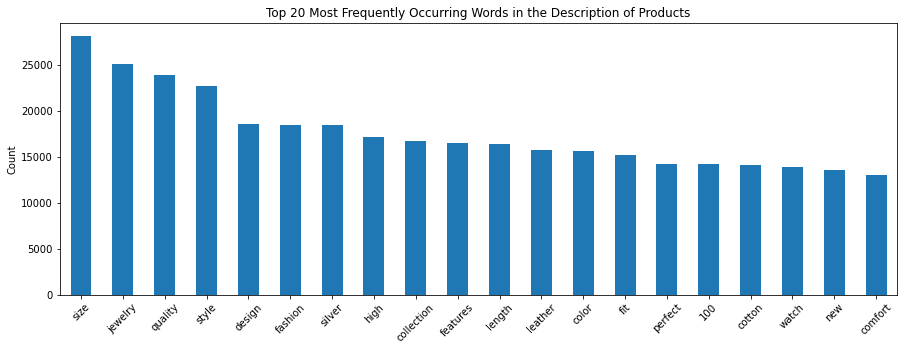

In [37]:
word_counts = pd.DataFrame(
    {"counts": transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Most Frequently Occurring Words in the Description of Products")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig('mostfrequentdesc.png')
plt.show()